In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from datetime import datetime
from datetime import timezone

from math import cos, radians

In [2]:
TMA_lon_old = [15.9854, 15.7247, 15.4078, 15.3864, 15.6594, 16.0503, 16.2683, 16.4347, 17.0932, 17.1607, 16.9543, 16.9061, 16.5407, 15.9854];
TMA_lon = [15.9854, 15.7247, 15.4078, 15.3864, 15.6594, 16.0503, 16.2683, 16.4347, 17.35, 16.9543, 16.9061, 16.5407, 15.9854]

TMA_lat_old = [48.7869, 48.7339, 48.2864, 48.1267, 47.8739, 47.5028, 47.2939, 47.2395, 47.7082, 48.0066, 48.5436, 48.7150, 48.8143, 48.7869];
TMA_lat = [48.7869, 48.7339, 48.2864, 48.1267, 47.8739, 47.5028, 47.2939, 47.2395, 47.7082, 48.5436, 48.715, 48.8143, 48.7869]

def plot_TMA_LOWW():
       
    rwy_16_34_lon=[16.58583, 16.59667]
    rwy_16_34_lat=[48.12194, 48.09222]

    rwy_11_29_lon=[16.53333, 16.58167]
    rwy_11_29_lat=[48.12694, 48.115]


    plt.plot(TMA_lon, TMA_lat, color="blue")
    plt.plot(rwy_16_34_lon, rwy_16_34_lat, color="red")
    plt.plot(rwy_11_29_lon, rwy_11_29_lat, color="red")
    
    circle_center_lon = 16.45
    circle_center_lat = 48.15

    ax = plt.gca()
    circle = plt.Circle((circle_center_lon, circle_center_lat), 0.03, fill=False, color="red")
    #ax.add_patch(circle)
   

In [3]:
def get_color(cluster):
    if cluster == 1:
        return 'lime'
    if cluster == 2:
        return 'brown'
    if cluster == 3:
        return 'orange'
    if cluster == 4:
        return 'green'
    if cluster == 5:
        return 'cyan'
    if cluster == 6:
        return 'darkviolet'
    if cluster == 7:
        return 'magenta'
    if cluster == 8:
        return 'pink'
    if cluster == 9:
        return 'darkblue'
    if cluster == 10:
        return 'blue'

In [4]:
def plot_legend(number_of_clusters):
    handles = []
    for i in range(0, number_of_clusters):
        cluster_color = get_color(i+1)
        color_patch = mpatches.Patch(color=cluster_color, label='cluster ' + str(i+1))
        handles += [color_patch]
    plt.legend(handles=handles, fontsize=10, loc="best")

In [5]:
from matplotlib import patches
def circle(fig, ax, xy, radius):

    # Get the transScale (important if one of the axis is in log-scale)
    trans_data = ax.transScale + (ax.transLimits + ax.transAxes)
    central_trans_data = trans_data.transform_point(xy)
    central_fig = fig.transFigure.inverted().transform(central_trans_data)

    # Create circle
    circ = patches.Ellipse(central_fig, radius, radius, transform=fig.transFigure, **{'color': 'red', 'fill': False, 'clip_on': False})

    # Draw circle
    ax.add_artist(circ)

16.59 48.1
1.497381329807535
1.73228000000001
0.47913732191100467
0.7174512802435211
0.7174512802435211


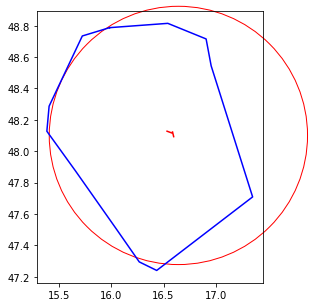

In [6]:
fig, ax = plt.subplots(1, 1,figsize=(5,5))

rwy_16_34_lon=[16.58583, 16.59667]
rwy_16_34_lat=[48.12194, 48.09222]
central_lat = 48.1
central_lon = 16.59

print(central_lon, central_lat)

# calculate the aspect ratio that will approximate a 
# Mercator projection at this central latitude 
mercator_aspect_ratio = 1/cos(radians(central_lat))

# set the aspect ratio of the axes to that
ax.set_aspect(mercator_aspect_ratio)

plot_TMA_LOWW()

xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.xlim(xlim)
plt.ylim(ylim)

print(mercator_aspect_ratio)
radius_degree = 0.83 # 1 degreee = 60 NM => 50 NM = 5/6 degree = 0.83
print(ylim[1] - ylim[0])
radius_percent = radius_degree/(ylim[1] - ylim[0])
print(radius_percent)
radius = radius_percent * mercator_aspect_ratio
print(radius)

print(radius)
circle(fig, ax, (central_lon, central_lat), radius)

16.3682 48.0269
0.7164331371656582


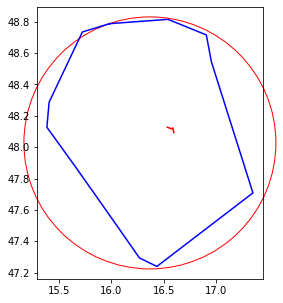

In [7]:
fig, ax = plt.subplots(1, 1,figsize=(5,5))

central_lat = min(TMA_lat) + (max(TMA_lat)-min(TMA_lat))/2
central_lon = min(TMA_lon) + (max(TMA_lon)-min(TMA_lon))/2
print(central_lon, central_lat)

# calculate the aspect ratio that will approximate a 
# Mercator projection at this central latitude 
mercator_aspect_ratio = 1/cos(radians(central_lat))

# set the aspect ratio of the axes to that
ax.set_aspect(mercator_aspect_ratio)

plot_TMA_LOWW()

xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.xlim(xlim)
plt.ylim(ylim)

radius_degree = 0.83 # 1 degreee = 60 NM => 50 NM = 5/6 degree = 0.83
radius_percent = radius_degree/(ylim[1] - ylim[0])
radius = radius_percent * mercator_aspect_ratio
print(radius)

radius = 0.7
circle(fig, ax, (central_lon, central_lat), radius)

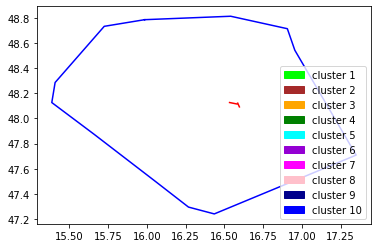

In [8]:
plot_TMA_LOWW()
plot_legend(10)

In [9]:
central_lat = min(TMA_lat) + (max(TMA_lat)-min(TMA_lat))/2

def plot_horizontal_profile_clustering(df, runway, linewidth, number_of_clusters, clustering_df):
    #plt.figure(figsize=(6,6))
    fig, ax = plt.subplots(1, 1,figsize=(10,10))
    
    # calculate the aspect ratio that will approximate a 
    # Mercator projection at this central latitude 
    mercator_aspect_ratio = 1/cos(radians(central_latitude))

    # set the aspect ratio of the axes to that
    ax.set_aspect(mercator_aspect_ratio)

    #plt.axes().set_aspect('equal')
    
    #ax.set_aspect('equal', adjustable='box')
    #ax.set_xlim(16,20)
    #ax.set_ylim(57.5,61.5)
    
    plt.xlabel('Longitude', fontsize=25)
    plt.ylabel('Latitude', fontsize=25)  
    
    plt.tick_params(labelsize=15)
    
    plot_TMA_LOWW()
    
    if df.empty:
        return
    
    for flight_id, new_df in df.groupby(level='flight_id'):
        #print(flight_id)
        flight_states_df = df.loc[(flight_id,), :]
        lon = []
        lat = []
        
        #flight_states_df = flight_states_df[flight_states_df['altitude']>400] # temp
        
        #print(flight_states_df.tail())
        for seq, row in flight_states_df.groupby(level='sequence'):
        
            lon.append(row['lon'].item())
            lat.append(row['lat'].item())
        
        color = get_color(clustering_df.loc[flight_id]['cluster'])
        plt.plot(lon, lat, color=color, linewidth=linewidth)
        plt.plot(clustering_df.loc[flight_id]['center_lon'], clustering_df.loc[flight_id]['center_lat'], 'ro')
    plot_legend(number_of_clusters)

In [26]:
central_lat = min(TMA_lat) + (max(TMA_lat)-min(TMA_lat))/2
central_lon = min(TMA_lon) + (max(TMA_lon)-min(TMA_lon))/2
 
def plot_horizontal_profile_LOWW(df, runway, linewidth, title = ""):
    
    #central_lat = 48.1
    #central_lon = 16.59
    
    #plt.figure(figsize=(6,6))
    fig, ax = plt.subplots(1, 1,figsize=(10,10))
    plt.title(title)
    
    # calculate the aspect ratio that will approximate a 
    # Mercator projection at this central latitude 
    mercator_aspect_ratio = 1/cos(radians(central_lat))

    # set the aspect ratio of the axes to that
    ax.set_aspect(mercator_aspect_ratio)

    #plt.axes().set_aspect('equal')
    
    #ax.set_aspect('equal', adjustable='box')
    #ax.set_xlim(16,20)
    #ax.set_ylim(57.5,61.5)
    
    plt.xlabel('Longitude', fontsize=25)
    plt.ylabel('Latitude', fontsize=25)  
    
    plt.tick_params(labelsize=15)
    
    plot_TMA_LOWW()
    
    if df.empty:
        return
    
    for flight_id, new_df in df.groupby(level='flight_id'):
        #print(flight_id)
        flight_states_df = df.loc[(flight_id,), :]
        lon = []
        lat = []
        
        #flight_states_df = flight_states_df[flight_states_df['altitude']>400] # temp
        
        #print(flight_states_df.tail())
        for seq, row in flight_states_df.groupby(level='sequence'):
        
            lon.append(row['lon'].item())
            lat.append(row['lat'].item())
        
        #plt.plot(lon, lat, color='k', linewidth=linewidth)
        plt.plot(lon, lat, linewidth=linewidth)
        
        last_points_lon = lon[-30:]
        last_points_lat = lat[-30:]
        #plt.plot(last_points_lon, last_points_lat, color='red', linewidth=linewidth)
        
        trajectory_point_last = [lat[-1], lon[-1]]

        # 30 seconds before:
        #trajectory_point_before_last = [lat[-30], lon[-30]]
        
        #print(trajectory_point_before_last)
        #print(trajectory_point_last)
        
        #trajectory_azimuth, temp1, temp2 = geod.inv(trajectory_point_before_last[0], trajectory_point_before_last[1],
        #                                            trajectory_point_last[0], trajectory_point_last[1])
        #print(trajectory_azimuth)
    plt.savefig("pictures/problematic_cluster_by_flight/" + title + ".png")
    
        # plot 50 NM circle
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    plt.xlim(xlim)
    plt.ylim(ylim)

    radius_degree = 0.83 # 1 degreee = 60 NM => 50 NM = 5/6 degree = 0.83
    radius_percent = radius_degree/(ylim[1] - ylim[0])
    radius = radius_percent * mercator_aspect_ratio
    print(radius) # 0.68
    
    radius = 0.69
    
    circle(fig, ax, (central_lon, central_lat), radius)

In [11]:
def plot_vertical_profile(flight_df, final_approach, linewidth):
    
    df = flight_df[flight_df['altitude']>=final_approach]
       
    for flight_id, flight_id_group in df.groupby(level='flight_id'):
        flight_states_df = df.loc[(flight_id,), :]
        
        flight_states_df =flight_states_df.sort_index(level=['sequence'], ascending = False)
        
        if not flight_states_df.empty:

            opensky_states_altitudes = flight_id_group['altitude'].tolist()
            opensky_states_times = flight_id_group.index.get_level_values('sequence').tolist()

            prev_altitude = final_approach
                
            plt.plot(opensky_states_times, opensky_states_altitudes, color='k', linewidth=linewidth)


In [12]:
def plot_raw_vertical_profile(flight_df, final_approach, linewidth):
    
    df = flight_df[flight_df['altitude']>=final_approach]
       
    for flight_id, flight_id_group in df.groupby(level='flight_id'):
        flight_states_df = df.loc[(flight_id,), :]
        
        flight_states_df =flight_states_df.sort_index(level=['sequence'], ascending = False)
        
        if not flight_states_df.empty:

            opensky_states_altitudes = flight_id_group['rawAltitude'].tolist()
            opensky_states_times = flight_id_group.index.get_level_values('sequence').tolist()

            prev_altitude = final_approach
                
            plt.plot(opensky_states_times, opensky_states_altitudes, color='k', linewidth=linewidth)

# Data uploading

In [14]:
filename = "../data/LOWW_50NM/2019/Dataset/LOWW_dataset_TT_50NM.csv"
dataset_TT_df = pd.read_csv(filename, sep=' ',
                            names = ['flight_id', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'beginDate', 'endDate'])
dataset_TT_df.set_index(['flight_id', 'sequence'], inplace = True)
number_of_flights = len(dataset_TT_df.groupby(level='flight_id')) 
print(number_of_flights)

1551


0.6780281877454848


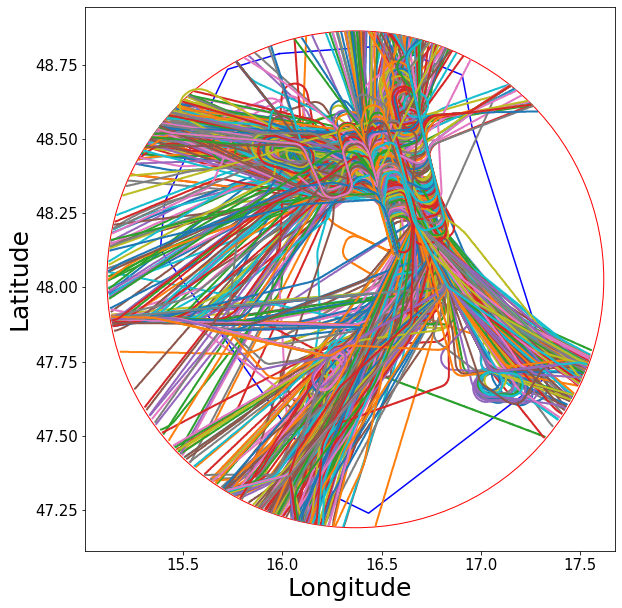

In [27]:
plot_horizontal_profile_LOWW(dataset_TT_df, "x", 2)